# Balanceo del dataset

In [16]:
pip install imbalanced-learn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

In [ ]:
covertype = fetch_ucirepo(id=31)


In [20]:
X = covertype.data.features
y = covertype.data.targets

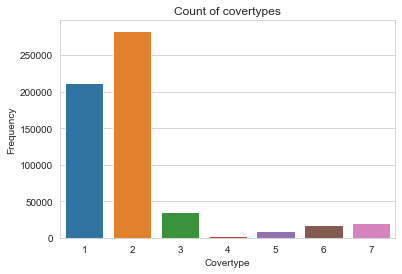

In [11]:
#Tabla de frecuencias de los covertypes
sns.set_style("whitegrid")
plt.title('Count of covertypes')
sns.countplot(x=y.Cover_Type)
plt.xlabel('Covertype')
plt.ylabel('Frequency')
plt.show()

A la luz del desbalanceo que tenemos en el covertype, donde los covertype 1 y 2 tienen una frecuencia mucho mas alta que las otras clases, vamos a aplicar metodos de desbalanceo para poder trabajar nuestros modelos de Machine Learning

## Técnica de sobremuestreo sintético de minorías(SMOTE)

La técnica de sobremuestreo sintético de minorías (SMOTE) es un potente método utilizado para tratar el desequilibrio de clases en los conjuntos de datos. SMOTE resuelve este problema generando muestras de clases minoritarias para equilibrar la distribución de clases. SMOTE funciona generando ejemplos sintéticos en el espacio de características de la clase minoritaria.
Procedimiento de trabajo de SMOTE:
    Identificación de ejemplos de clases minoritarias: SMOTE funciona en conjuntos de datos en los que una o más clases están significativamente infrarrepresentadas en comparación con otras. El primer paso consiste en identificar la clase o clases minoritarias en el conjunto de datos.
    Selección del vecino más próximo: Para cada clase minoritaria, SMOTE identifica sus k vecinos más cercanos en el espacio de características. El número de vecinos más próximos, denominado k, es un parámetro especificado por el usuario.
    Generación de muestras sintéticas: Para cada instancia de clase minoritaria, SMOTE selecciona aleatoriamente uno de sus k vecinos más cercanos. A continuación, genera muestras sintéticas a lo largo del segmento de línea que une el caso de clase minoritaria y el vecino más próximo seleccionado en el espacio de características.
    Sobremuestreo controlado: La cantidad de sobremuestreo se controla mediante un parámetro denominado proporción de sobremuestreo, que especifica la proporción deseada de muestras sintéticas con respecto a las muestras reales de la clase minoritaria. Por defecto, SMOTE intenta equilibrar la distribución de clases generando muestras sintéticas hasta que la clase minoritaria alcanza el mismo tamaño que la clase mayoritaria.
    Repetir para todas las clases minoritarias C


## ADASYN: método de muestreo sintético adaptativo

ADASYN, una extensión de la técnica SMOTE, también se utiliza para tratar conjuntos de datos desequilibrados. ADASYN se centra en las densidades locales de las clases minoritarias. Averigua las regiones en las que el desequilibrio es muy grave y aplica la estrategia para generar muestras sintéticas en ellas. Genera más muestras donde la densidad es alta y menos muestras donde la densidad es baja. Este enfoque es muy útil en situaciones en las que la distribución de clases varía en el espacio de características.
Procedimiento de trabajo de ADASYN

    Ratios de desequilibrio de clases: El paso inicial de ADASYN es calcular el ratio de clase minoritaria que se obtiene dividiendo el número de muestras de clase mayoritaria por el número de muestras de clase minoritaria.
    Hallar la distribución de densidad: Para cada instancia minoritaria, encontramos sus k vecinos más cercanos. A continuación, hallamos la distancia entre ellos utilizando métricas como la distancia Manhattan o la distancia euclidiana. Si las instancias están rodeadas por más vecinos cercanos, consideramos que la densidad es más alta; de lo contrario, la densidad se considera baja.
    Ratio de generación de muestras: Una vez calculados el ratio de desequilibrio de clases y la distribución de la densidad, calculamos el ratio de generación de muestras. Averigua cuántas muestras deben generarse para cada caso de clase minoritaria. Para densidades más altas e instancias desequilibradas más grandes, se generan más muestras sintéticas.
    Generación de muestras sintéticas: Combinando las instancias minoritarias con sus vecinos más cercanos, se generan nuevas muestras.
    Creación de conjuntos de datos equilibrados: Al combinar las nuevas muestras sintéticas con las instancias minoritarias originales, aumenta la frecuencia de las clases minoritarias. Esto equilibra el conjunto de datos y ayuda al modelo a aprender con mayor precisión.
    
    

In [35]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [38]:
# Applying ADASYN
adasyn = ADASYN(random_state = 42)
X_train_ADA, y_train_ADA = adasyn.fit_resample(X_train, y_train)
# Count outcome values after applying ADASYN
y_train_ADA.value_counts()

Cover_Type
5             227081
6             226948
4             226836
2             226801
7             226673
1             225805
3             225453
dtype: int64

In [25]:
y_train.value_counts()


Cover_Type
2             226801
1             169283
3              28633
7              16495
6              13878
5               7498
4               2221
dtype: int64

In [26]:
y_train_res.value_counts()

Cover_Type
1             226801
2             226801
3             226801
4             226801
5             226801
6             226801
7             226801
dtype: int64

In [33]:
# Entrenar modelo
model = RandomForestClassifier(random_state = 42, max_depth = 5)
model.fit(X_train, y_train)

# Evaluar
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

C:\Users\ALEJAN~1\AppData\Local\Temp/ipykernel_7620/747641090.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


              precision    recall  f1-score   support

           1       0.66      0.72      0.69     42557
           2       0.71      0.78      0.74     56500
           3       0.61      0.61      0.61      7121
           4       0.00      0.00      0.00       526
           5       0.00      0.00      0.00      1995
           6       0.00      0.00      0.00      3489
           7       0.00      0.00      0.00      4015

    accuracy                           0.68    116203
   macro avg       0.28      0.30      0.29    116203
weighted avg       0.62      0.68      0.65    116203



d:\Miniconda\envs\ml_venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Miniconda\envs\ml_venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Miniconda\envs\ml_venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# Entrenar modelo
model = RandomForestClassifier(random_state = 42, max_depth = 5)
model.fit(X_train_res, y_train_res)

# Evaluar
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

C:\Users\ALEJAN~1\AppData\Local\Temp/ipykernel_7620/1867543609.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_res, y_train_res)


              precision    recall  f1-score   support

           1       0.65      0.52      0.58     42557
           2       0.80      0.40      0.54     56500
           3       0.72      0.53      0.61      7121
           4       0.21      0.94      0.34       526
           5       0.06      0.82      0.12      1995
           6       0.36      0.64      0.46      3489
           7       0.25      0.92      0.40      4015

    accuracy                           0.49    116203
   macro avg       0.44      0.68      0.43    116203
weighted avg       0.69      0.49      0.54    116203



In [39]:
# Entrenar modelo 
model = RandomForestClassifier(random_state = 42, max_depth = 5)
model.fit(X_train_ADA, y_train_ADA)

# Evaluar
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

C:\Users\ALEJAN~1\AppData\Local\Temp/ipykernel_7620/1705256680.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_ADA, y_train_ADA)


              precision    recall  f1-score   support

           1       0.67      0.40      0.50     42557
           2       0.78      0.43      0.56     56500
           3       0.62      0.82      0.71      7121
           4       0.37      0.59      0.46       526
           5       0.07      0.83      0.12      1995
           6       0.30      0.30      0.30      3489
           7       0.20      0.98      0.33      4015

    accuracy                           0.47    116203
   macro avg       0.43      0.62      0.42    116203
weighted avg       0.68      0.47      0.52    116203

